In [2]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/28/3c/ddf5d9eb742cdb7fbcd5c854bce07471bad01194ac37de91db64fbef0c58/xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
file_path = "Downloads/hermes_churn_data_complex.csv"  # Adjust path if necessary
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

   CustomerID  Gender  Age  TenureMonths  MonthlyCharges  TotalCharges  \
0           1  Female   28            41           92.86       3316.31   
1           2  Female   27            10           84.57       3854.69   
2           3  Female   64            62          118.57       6426.24   
3           4  Female   56            26           41.39       6516.08   
4           5    Male   51            68           79.79       5897.41   

   NumSupportCalls  IsSeniorCitizen Partner Dependents  ...        Contract  \
0                6                0     Yes         No  ...  Month-to-month   
1                0                0      No        Yes  ...  Month-to-month   
2                8                0      No        Yes  ...        Two year   
3                7                0      No        Yes  ...  Month-to-month   
4                1                0      No        Yes  ...  Month-to-month   

               PaymentMethod StreamingTV StreamingMovies DeviceProtection  \
0  

In [8]:
# Dataset overview
print(data.info())

# Summary statistics
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        1000 non-null   int64  
 1   Gender            1000 non-null   object 
 2   Age               1000 non-null   int64  
 3   TenureMonths      1000 non-null   int64  
 4   MonthlyCharges    1000 non-null   float64
 5   TotalCharges      1000 non-null   float64
 6   NumSupportCalls   1000 non-null   int64  
 7   IsSeniorCitizen   1000 non-null   int64  
 8   Partner           1000 non-null   object 
 9   Dependents        1000 non-null   object 
 10  InternetService   1000 non-null   object 
 11  Contract          1000 non-null   object 
 12  PaymentMethod     1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  DeviceProtection  1000 non-null   object 
 16  TechSupport       1000 non-null   object 
 

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Confirm preprocessing
print(data.head())

   CustomerID  Gender  Age  TenureMonths  MonthlyCharges  TotalCharges  \
0           1       0   28            41           92.86       3316.31   
1           2       0   27            10           84.57       3854.69   
2           3       0   64            62          118.57       6426.24   
3           4       0   56            26           41.39       6516.08   
4           5       1   51            68           79.79       5897.41   

   NumSupportCalls  IsSeniorCitizen  Partner  Dependents  ...  Contract  \
0                6                0        1           0  ...         0   
1                0                0        0           1  ...         0   
2                8                0        0           1  ...         2   
3                7                0        0           1  ...         0   
4                1                0        0           1  ...         0   

   PaymentMethod  StreamingTV  StreamingMovies  DeviceProtection  TechSupport  \
0              1       

In [10]:
# Define features and target variable
X = data.drop(columns=["CustomerID", "Churn"])  # Drop ID and target column
y = data["Churn"]

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (800, 19)
Testing data size: (200, 19)


In [12]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       145
           1       0.25      0.24      0.24        55

    accuracy                           0.59       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.59      0.59      0.59       200

Accuracy: 0.595


In [14]:
# Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.78       145
           1       0.27      0.16      0.20        55

    accuracy                           0.65       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.60      0.65      0.62       200

Accuracy: 0.65


In [15]:
# Calculate ROC-AUC scores
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("Decision Tree ROC-AUC Score:", roc_auc_dt)
print("XGBoost ROC-AUC Score:", roc_auc_xgb)

Decision Tree ROC-AUC Score: 0.4836990595611285
XGBoost ROC-AUC Score: 0.533667711598746


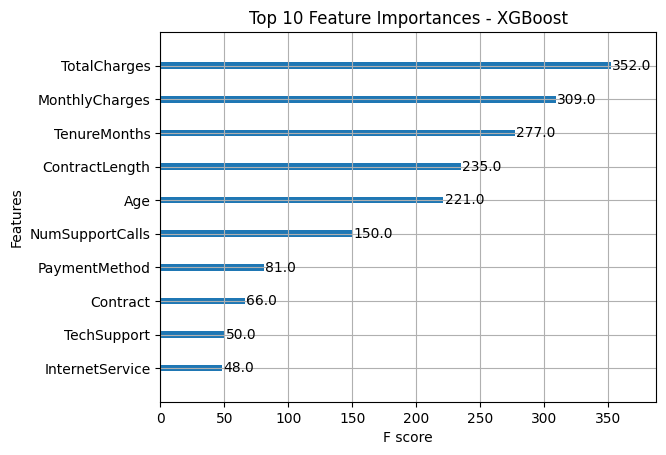

In [17]:
# Plot feature importance for XGBoost
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()

In [18]:
import joblib

# Save Decision Tree model
joblib.dump(dt_model, "decision_tree_model.pkl")

# Save XGBoost model
joblib.dump(xgb_model, "xgboost_model.pkl")

['xgboost_model.pkl']

In [19]:
# Load models
dt_model_loaded = joblib.load("decision_tree_model.pkl")
xgb_model_loaded = joblib.load("xgboost_model.pkl")

# Predict using loaded models
sample_data = X_test.iloc[:1]  # Take a single row for prediction
print("Decision Tree Prediction:", dt_model_loaded.predict(sample_data))
print("XGBoost Prediction:", xgb_model_loaded.predict(sample_data))

Decision Tree Prediction: [1]
XGBoost Prediction: [0]
